### Dataset Visualizations

Dataset used: [Metro dataset](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume)

##### Features:
* holiday: US National Holiday + Minnesota State Holiday
* temp: average Temperature in Kelvin
* rain_1h: mm or Rain
* snow_1h: mm of Snow
* clouds_all: percentage of cloud cover
* weather_main: short text descr. of weather
* weather_description: longer text descr. of weather
* date_time: datetime
* traffic_volume: westbound Traffic Volume (Ground Truth)

In [1]:
# All imports needed
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import neighbors
from sklearn.tree import DecisionTreeRegressor

In [2]:
# Read data from file
metro_wmain = pd.read_csv("../data/metro/metro_weather_main.csv")
metro_wmain_s = pd.read_csv("../data/metro/metro_weather_main_s.csv")

metro_wdescr = pd.read_csv("../data/metro/metro_weather_descr.csv")
metro_wdescr_s = pd.read_csv("../data/metro/metro_weather_descr_s.csv")

metro_wall = pd.read_csv("../data/metro/metro_weather_all.csv")
metro_wall_s = pd.read_csv("../data/metro/metro_weather_all_s.csv")


#### Dataset Exploration:

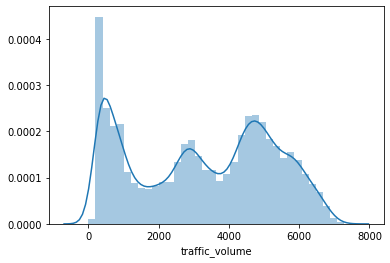

In [3]:
# distribution of target attribute "quality"
sns.distplot(metro_wmain['traffic_volume']) # kde=0 if kernel density estimation is not necessary

# Scatterplot-Matrix visualises correlation of every possible combination of attributes, 
# especially the correlation of the input attributes and the target attribute quality is of importance
# sns.pairplot(metro_wmain)

# heatmap visualises the correlation of each pair of values
# sns.heatmap(metro_wmain.corr())

#### Modeling:

In [4]:
def linear_reg(dataset, name):
    train, test = train_test_split(dataset, test_size=0.2)
    
    # Training Model
    x_train = train.drop('traffic_volume', axis=1)
    y_train = train['traffic_volume']

    model = LinearRegression()
    model.fit(x_train, y_train)

    r_sq = model.score(x_train, y_train)

    # Testing
    x_test = test.drop('traffic_volume', axis=1)
    y_test = test['traffic_volume']
    y_pred = model.predict(x_test)
    return([name, r_sq, y_test, y_pred])

In [5]:
def polynomial_reg(dataset, name):
    train, test = train_test_split(dataset, test_size=0.2)
    
    # Training Model
    x_train = train.drop('traffic_volume', axis=1)
    y_train = train['traffic_volume']

    model = PolynomialFeatures(degree=2)
    x_poly = model.fit_transform(x_train)

    model.fit(x_poly, y_train)

    r_sq = model.score(x_train, y_train)

    # Testing
    x_test = test.drop('traffic_volume', axis=1)
    y_test = test['traffic_volume']
    y_pred = model.predict(x_test)
    return([name, r_sq, y_test, y_pred])

In [6]:
def knn_reg(dataset, name):
    train, test = train_test_split(dataset, test_size=0.2)
    k_neighbors = 5
    
    # Training Model
    x_train = train.drop('traffic_volume', axis=1)
    y_train = train['traffic_volume']

    model = neighbors.KNeighborsRegressor(k_neighbors)
    model.fit(x_train, y_train)

    r_sq = model.score(x_train, y_train)

    # Testing
    x_test = test.drop('traffic_volume', axis=1)
    y_test = test['traffic_volume']
    y_pred = model.predict(x_test)
    return([name, r_sq, y_test, y_pred])

In [7]:
def reg_tree(dataset, name):
    train, test = train_test_split(dataset, test_size=0.2)
    
    # Training Model
    x_train = train.drop('traffic_volume', axis=1)
    y_train = train['traffic_volume']

    model = DecisionTreeRegressor(random_state=0)
    model.fit(x_train, y_train)

    r_sq = model.score(x_train, y_train)

    # Testing
    x_test = test.drop('traffic_volume', axis=1)
    y_test = test['traffic_volume']
    y_pred = model.predict(x_test)
    return([name, r_sq, y_test, y_pred])

In [8]:
def plot(fig, data, row):
    for i, d in enumerate(data):
        plot_nr = row*3+i+1
        ax = fig.add_subplot(3,3,plot_nr)
        ax.scatter(d[2], d[3])
        ax.set_title(d[0])
        ax.set_aspect('equal')
        plt.xticks(())
        plt.yticks(())

linear done
knn done
tree done


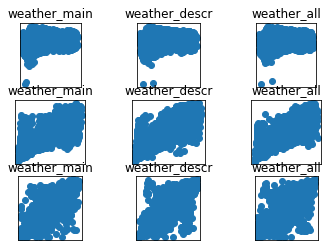

In [13]:
names = ['weather_main', 'weather_descr', 'weather_all']
# datasets = [metro_wmain, metro_wdescr, metro_wall]
datasets = [metro_wmain_s, metro_wdescr_s, metro_wall_s]

# linear regression
y_m = linear_reg(datasets[0], names[0])
y_d = linear_reg(datasets[1], names[1])
y_a = linear_reg(datasets[2], names[2])
linear = [y_m, y_d, y_a]
print('linear done')

# polynomial regression
# y_m = polynomial_reg(datasets[0], names[0])
# y_d = polynomial_reg(datasets[1], names[1])
# y_a = polynomial_reg(datasets[2], names[2])
# poly = [y_m, y_d, y_a]
# print('polynomial done')

# knn regression
y_m = knn_reg(datasets[0], names[0])
y_d = knn_reg(datasets[1], names[1])
y_a = knn_reg(datasets[2], names[2])
knn = [y_m, y_d, y_a]
print('knn done')

# regression tree
y_m = reg_tree(datasets[0], names[0])
y_d = reg_tree(datasets[1], names[1])
y_a = reg_tree(datasets[2], names[2])
tree = [y_m, y_d, y_a]
print('tree done')

# Plot outputs
fig = plt.figure()

plot(fig, linear, row=0)
# plot(fig, poly, row=2)
plot(fig, knn, row=1)
plot(fig, tree, row=2)

plt.show()